# Mushroom Classification
### Import the library

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler

%matplotlib inline
random.seed(123)

### Import the dataset

In [69]:
originalData = pd.read_csv('mushrooms.csv')
data = originalData.copy()   # Copy original data to other so that data isn't changed for the original file

In [70]:
data.shape

(8124, 23)

In [71]:
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

Class defines whether the mushroom is edible(e) or poisonous(p)

### Finding number of mushrooms in different habitats

In [72]:
habitat_dist = pd.value_counts(data['habitat'])

In [73]:
habitat_dist

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [74]:
class_dist = pd.value_counts(data['class'])
class_dist

e    4208
p    3916
Name: class, dtype: int64

In [75]:
print('%.2f%% of all the mushrooms are edible.' %(class_dist[0]/sum(class_dist)*100))

51.80% of all the mushrooms are edible.


### Pie plot for habitat

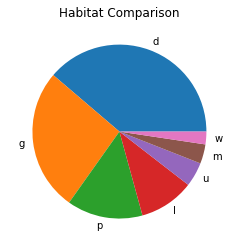

In [76]:
values = [habitat_dist[0],habitat_dist[1],habitat_dist[2],habitat_dist[3],habitat_dist[4],habitat_dist[5],habitat_dist[6]]
lb = ["d","g","p","l","u","m","w"]
plt.pie(values, labels=lb)
plt.title("Habitat Comparison")
plt.show()

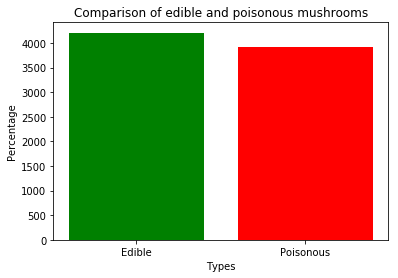

In [77]:
plt.bar(["Edible","Poisonous"], [class_dist[0],class_dist[1]], color=['green', 'red'])
plt.xlabel("Types")
plt.ylabel("Percentage")
plt.title("Comparison of edible and poisonous mushrooms")
plt.show()

In [78]:
#Obtain total number of mushrooms for each 'odor' (Entire DataFrame)
odor_dist = pd.value_counts(data['odor'])
odor_dist

n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

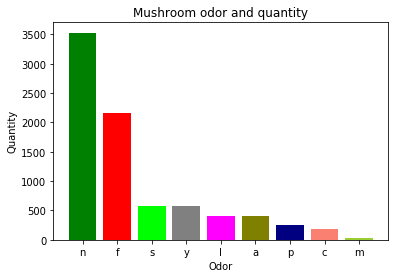

In [79]:
plt.bar(["n","f","s","y","l","a","p","c","m"], 
        [odor_dist[0], odor_dist[1], odor_dist[2], odor_dist[3], odor_dist[4], odor_dist[5], odor_dist[6],
         odor_dist[7], odor_dist[8]], 
        color=['green','red','lime','grey','fuchsia','olive','navy','salmon','yellowgreen'])
plt.xlabel("Odor")
plt.ylabel("Quantity")
plt.title("Mushroom odor and quantity")
plt.show()

### LabelEncoding

Here we can see that all the columns of the dataframe are of the object type so in order to properly analyze them, we need to encode the object values in each column with the appropriate numerical value.

In [80]:
# Importing libraries
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
data['class']=labelencoder.fit_transform(data['class'])
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      1         x           s         n       t    p               f   
1      0         x           s         y       t    a               f   
2      0         b           s         w       t    l               f   
3      1         x           y         w       t    p               f   
4      0         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

#### Now, poisonous is represented by 1 and edible is represented by 0.

#### Now one-hot encoding the other features

In [81]:
encoded_data = pd.get_dummies(data)
encoded_data.head()

class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0      1            0            0            0            0            0   
1      0            0            0            0            0            0   
2      0            1            0            0            0            0   
3      1            0            0            0            0            0   
4      0            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  ...  \
0            1              0              0              1  ...   
1            1              0              0              1  ...   
2            0              0              0              1  ...   
3            1              0              0              0  ...   
4            1              0              0              1  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1             0             0          0          0          0   
1             0             0             0          0          1          0   
2             0             0             0          0          0          0   
3             1             0             0          0          0          0   
4             0             0             0          0          1          0   

   habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          1          0  
1          0          0          0          0  
2          1          0          0          0  
3          0          0          1          0  
4          0          0          0          0  

[5 rows x 118 columns]

## Modelling

### Train/test split

Before modelling and makingp predictions, we need to split the data into the traing set and test set. This way, we will train the data on one set and we will make predictions on other set.

- 70% - train set
- 30% - test set

In [85]:
from sklearn.model_selection import train_test_split
x = encoded_data
y = data['class'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

### Logistic Regression

#### Importing libraries

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Making an instance of the LogisticRegression object and fit the model to the traning set

In [95]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, Y_train.ravel())

/home/chauhan/anaconda3/envs/MLProject/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)